In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,f1_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

In [3]:
#Loading CSV File
df=pd.read_csv(r"C:\Users\Nimisha\Downloads\creditcard.csv\creditcard.csv")
#Printing the first 5 rows 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Printing last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#Finding number of rows and columns
df.shape

(284807, 31)

In [6]:
#Describing the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Printing column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
#Printing Data Types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
#Data Cleaning
#Chceking for Duplicate Values
df[df.duplicated()==True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [11]:
df=df.drop_duplicates()

In [12]:
#Chceking Number of Rows and Columns
df.shape

(283726, 31)

In [13]:
#Chceking for Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

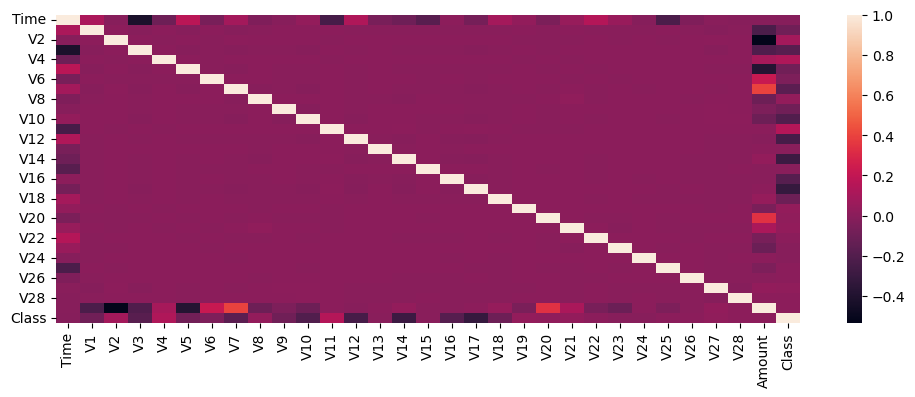

In [14]:
#Plotting the heatmap 
plt.figure(figsize=(12,4))
sns.heatmap(df.corr())
plt.show()

In [15]:
#Print first 2 rows
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [16]:
#Feature Scaling For Amount
#All the values were within same range except Amount so we did Feature Scaling to get in within same Range
s=StandardScaler()

In [17]:
df['Amount']=s.fit_transform(pd.DataFrame(df['Amount']))

In [18]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [19]:
#Dropping Time Column 
df=df.drop('Time',axis=1)

In [21]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [22]:
df.shape

(283726, 30)

In [23]:
#Checking Class values 
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

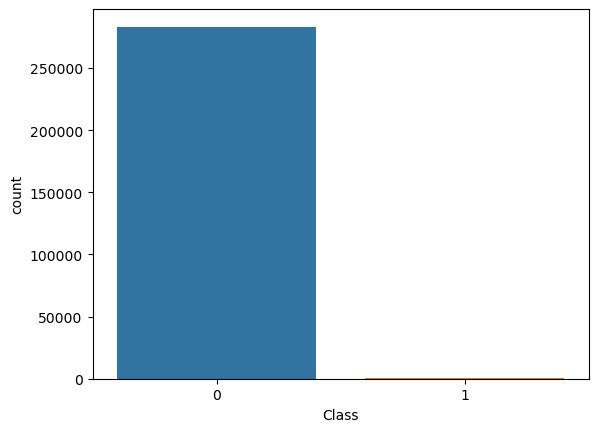

In [24]:
#Plotting values of Class
sns.countplot(x='Class',data=df)

In [25]:
#This is unbalanced because here we are having two classes in which one class(0) is having very high number of values but the other class(1) is having no values or less number of values.

In [26]:
#Printing first 2 Rows
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [27]:
#Modelling
#Selecting Values of X and Y
x=df.drop("Class",axis=1)
y=df['Class']

In [28]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


In [29]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [30]:
#Dividing into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 29)
(56746, 29)
(226980,)
(56746,)


In [31]:
#Handling Imbalanced DataSet
#UnderSampling
normal=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [32]:
normal.shape

(283253, 30)

In [33]:
fraud.shape

(473, 30)

In [34]:
#Selecting random sample with the help of Sample Method
#This will Select 473 Random Samples
normal_sample=normal.sample(n=473)

In [35]:
normal_sample.shape

(473, 30)

In [36]:
#Cocactenating
new_df=pd.concat([normal_sample,fraud],ignore_index=True)

In [37]:
new_df['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [38]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.112044,-0.120974,1.089128,1.155584,-0.602263,0.703693,-0.804189,0.418918,0.590884,0.069892,...,0.169824,0.638619,-0.098400,-0.300344,0.423074,-0.207137,0.075944,0.016664,-0.349333,0
1,1.954637,-0.420713,-0.326473,0.335511,-0.558564,-0.099311,-0.665372,0.067307,1.138016,-0.014253,...,0.231860,0.923165,0.059824,-0.293692,-0.063649,-0.214933,0.041565,-0.048329,-0.313431,0
2,-11.117455,5.694999,-8.679425,1.580531,-6.869943,-1.506286,-4.292426,6.993367,0.936542,0.931929,...,0.118733,-0.457425,-0.484275,0.318454,0.088664,-0.438821,0.045013,-0.114809,0.006060,0
3,-0.780566,0.664675,1.832374,0.647674,1.123108,2.229341,0.474599,0.543709,-0.005425,-0.245743,...,-0.515526,-0.948277,-0.164671,-1.710664,0.207010,-0.699375,0.230199,-0.105916,-0.261074,0
4,2.226073,-1.569579,-1.010809,-1.560974,-1.263774,-0.563964,-1.105502,-0.216312,-1.041144,1.539470,...,-0.171216,-0.083407,0.121536,-0.673799,-0.183584,-0.142754,0.009477,-0.043958,-0.071177,0


In [39]:
#Selecting X and Y
x=new_df.drop(["Class"],axis=1)
y=new_df['Class']

In [40]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.112044,-0.120974,1.089128,1.155584,-0.602263,0.703693,-0.804189,0.418918,0.590884,0.069892,...,-0.201844,0.169824,0.638619,-0.098400,-0.300344,0.423074,-0.207137,0.075944,0.016664,-0.349333
1,1.954637,-0.420713,-0.326473,0.335511,-0.558564,-0.099311,-0.665372,0.067307,1.138016,-0.014253,...,-0.160704,0.231860,0.923165,0.059824,-0.293692,-0.063649,-0.214933,0.041565,-0.048329,-0.313431
2,-11.117455,5.694999,-8.679425,1.580531,-6.869943,-1.506286,-4.292426,6.993367,0.936542,0.931929,...,-0.040466,0.118733,-0.457425,-0.484275,0.318454,0.088664,-0.438821,0.045013,-0.114809,0.006060
3,-0.780566,0.664675,1.832374,0.647674,1.123108,2.229341,0.474599,0.543709,-0.005425,-0.245743,...,0.181428,-0.515526,-0.948277,-0.164671,-1.710664,0.207010,-0.699375,0.230199,-0.105916,-0.261074
4,2.226073,-1.569579,-1.010809,-1.560974,-1.263774,-0.563964,-1.105502,-0.216312,-1.041144,1.539470,...,-0.311663,-0.171216,-0.083407,0.121536,-0.673799,-0.183584,-0.142754,0.009477,-0.043958,-0.071177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64

In [42]:
#Dividing into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 29)
(190, 29)
(756,)
(190,)


In [43]:
#Logistic Regression
a=LogisticRegression()
b=a.fit(x_train,y_train)

In [44]:
#Predicting values of Test and Train
y_pred_test=b.predict(x_test)
y_pred_train=b.predict(x_train)

In [45]:
y_pred_test

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [46]:
y_pred_train

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [47]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_test)

0.9368421052631579

In [48]:
#Train Data
accuracy_score(y_train,y_pred_train)

0.9470899470899471

In [49]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_test)

0.96875

In [50]:
#Train Data
precision_score(y_train,y_pred_train)

0.9742120343839542

In [51]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_test)

0.7459893048128342

In [52]:
#Train Data
r2_score(y_train,y_pred_train)

0.7882871845135997

In [53]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_test)

0.9393939393939394

In [54]:
#Train Data
f1_score(y_train,y_pred_train)

0.9444444444444445

In [55]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_test)

0.9117647058823529

In [56]:
#Train Data
recall_score(y_train,y_pred_train)

0.9164420485175202

In [57]:
#Decision Tree Classifier
dt=DecisionTreeClassifier()
cd=dt.fit(x_train,y_train)

In [58]:
#Predicting test and Train Values
y_pred_testing=cd.predict(x_test)
y_pred_training=cd.predict(x_train)

In [59]:
y_pred_testing

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [60]:
y_pred_training

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [61]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_testing)

0.9263157894736842

In [62]:
#Train Data
accuracy_score(y_train,y_pred_training)

1.0

In [63]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_testing)

0.9489795918367347

In [64]:
#Train Data
precision_score(y_train,y_pred_training)

1.0

In [65]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_testing)

0.7036541889483066

In [66]:
#Train Data
r2_score(y_train,y_pred_training)

1.0

In [67]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_testing)

0.9300000000000002

In [68]:
#Train Data
f1_score(y_train,y_pred_training)

1.0

In [69]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_testing)

0.9117647058823529

In [70]:
#Train Data
recall_score(y_train,y_pred_training)

1.0

In [71]:
#Random Forest Classifier
r=RandomForestClassifier()
ra=r.fit(x_train,y_train)

In [72]:
#Predicting test and Train Values
y_pred_tested=ra.predict(x_test)
y_pred_trained=ra.predict(x_train)

In [73]:
y_pred_tested

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [74]:
y_pred_trained

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [75]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_tested)

0.9315789473684211

In [76]:
#Train Data
accuracy_score(y_train,y_pred_trained)

1.0

In [77]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_tested)

0.968421052631579

In [78]:
#Train Data
precision_score(y_train,y_pred_trained)

1.0

In [79]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_tested)

0.7248217468805704

In [80]:
#Train Data
r2_score(y_train,y_pred_trained)

1.0

In [81]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_tested)

0.934010152284264

In [82]:
#Train Data
f1_score(y_train,y_pred_trained)

1.0

In [83]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_tested)

0.9019607843137255

In [84]:
#Train Data
recall_score(y_train,y_pred_trained)

1.0

In [85]:
#Visualization of Accuracy Scores
fd=pd.DataFrame({'Models':['LR','DT','RF'],'ACC':[accuracy_score(y_test,y_pred_test)*100,
                                              accuracy_score(y_test,y_pred_testing)*100,
                                             accuracy_score(y_test,y_pred_tested)*100
                                              ]})
           

In [86]:
fd

,Models,ACC
0,LR,93.684211
1,DT,92.631579
2,RF,93.157895


<Axes: xlabel='Models', ylabel='ACC'>

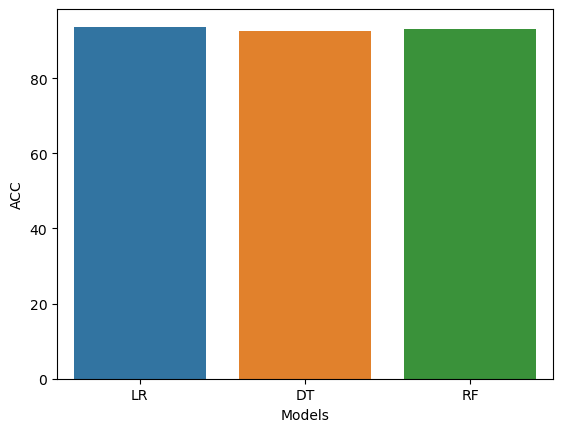

In [87]:
sns.barplot(x=fd['Models'],y=fd['ACC'])

In [88]:
#Over Sampling
#This is performed because when we peform undersampling we loose a lot of valuable Data

In [89]:
x=df.drop("Class",axis=1)
y=df['Class']

In [90]:
x.shape

(283726, 29)

In [91]:
y.shape

(283726,)

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
x_res,y_res=SMOTE().fit_resample(x,y)

In [94]:
y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [95]:
#Dividing into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(453204, 29)
(113302, 29)
(453204,)
(113302,)


In [96]:
#Logistic Regression after OverSampling
l=LogisticRegression()
loge=l.fit(x_train,y_train)

In [97]:
#Predicting Values of Test and Train Data
y_pred_test_ov=loge.predict(x_test)
y_pred_train_ov=loge.predict(x_train)

In [98]:
y_pred_test_ov

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [99]:
y_pred_train_ov

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [100]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_test_ov)

0.9442640024006637

In [101]:
#Train Data
accuracy_score(y_train,y_pred_train_ov)

0.9447423235452468

In [102]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_test_ov)

0.9725048630854407

In [103]:
#Train Data
precision_score(y_train,y_pred_train_ov)

0.9727484869400269

In [104]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_test_ov)

0.7770535543222902

In [105]:
#Train Data
r2_score(y_train,y_pred_train_ov)

0.7789691420417861

In [106]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_test_ov)

0.9427486106452228

In [107]:
#Train Data
f1_score(y_train,y_pred_train_ov)

0.94300546435651

In [108]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_test_ov)

0.9147592322173156

In [109]:
#Train Data
recall_score(y_train,y_pred_train_ov)

0.9150273392988066

In [110]:
#Decision Tree Classifier after OverSampling
fes=DecisionTreeClassifier()
g=fes.fit(x_train,y_train)

In [111]:
#Predicting Values of Test and Train Data
y_pred_tested_ov=loge.predict(x_test)
y_pred_trained_ov=loge.predict(x_train)

In [112]:
y_pred_tested_ov

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [113]:
y_pred_trained_ov

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [114]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_tested_ov)

0.9442640024006637

In [115]:
#Train Data
accuracy_score(y_train,y_pred_trained_ov)

0.9447423235452468

In [116]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_tested_ov)

0.9725048630854407

In [117]:
#Train Data
precision_score(y_train,y_pred_trained_ov)

0.9727484869400269

In [118]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_tested_ov)

0.7770535543222902

In [119]:
#Train Data
r2_score(y_train,y_pred_trained_ov)

0.7789691420417861

In [120]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_tested_ov)

0.9427486106452228

In [121]:
#Train Data
f1_score(y_train,y_pred_trained_ov)

0.94300546435651

In [122]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_tested_ov)

0.9147592322173156

In [123]:
#Train Data
recall_score(y_train,y_pred_trained_ov)

0.9150273392988066

In [124]:
#RandomForestClassifier after OverSampling
#Random Forest Classifier
rs=RandomForestClassifier()
p=rs.fit(x_train,y_train)

In [125]:
#Predicting test and Train Values
y_pred_testing_ov=ra.predict(x_test)
y_pred_training_ov=ra.predict(x_train)

In [126]:
y_pred_testing_ov

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [127]:
y_pred_training_ov

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [128]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_testing_ov)

0.947256006072267

In [129]:
#Train Data
accuracy_score(y_train,y_pred_training_ov)

0.9474033768457472

In [130]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_testing_ov)

0.9713814387129062

In [131]:
#Train Data
precision_score(y_train,y_pred_training_ov)

0.9710370036226997

In [132]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_testing_ov)

0.7890217008123525

In [133]:
#Train Data
r2_score(y_train,y_pred_training_ov)

0.7896133625703812

In [138]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_testing_ov)

0.9473874460048076

In [140]:
#Train Data
f1_score(y_train,y_pred_training_ov)

0.9480896596087811

In [141]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_testing_ov)

0.9222188989954081

In [142]:
#Train Data
recall_score(y_train,y_pred_training_ov)

0.9243553843843578

In [143]:
#Visualization of Accuracy Scores
fde=pd.DataFrame({'Models':['LR','DT','RF'],'ACC':[accuracy_score(y_test,y_pred_test_ov)*100,
                                              accuracy_score(y_test,y_pred_tested_ov)*100,
                                             accuracy_score(y_test,y_pred_testing_ov)*100
                                              ]})
           


In [144]:
fde

,Models,ACC
0,LR,94.373444
1,DT,94.373444
2,RF,94.861521


<Axes: xlabel='Models', ylabel='ACC'>

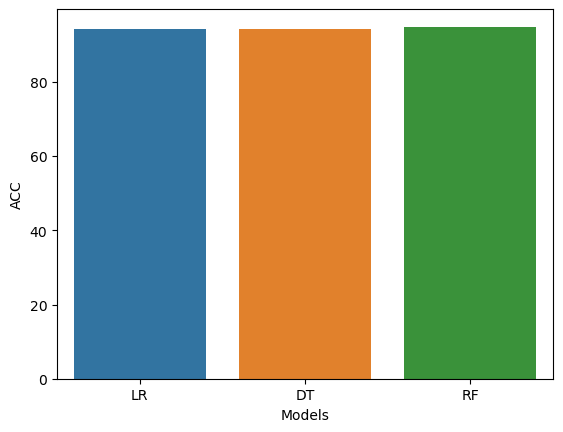

In [145]:
sns.barplot(x=fde['Models'],y=fde['ACC'])

In [146]:
#Save the model
#We will save the RandomForestClassifier because it is the best model
rf1=RandomForestClassifier()

In [147]:
rf1.fit(x_res,y_res)

RandomForestClassifier()

In [134]:
#This library is used for serializing (saving) and deserializing (loading) Python objects, such as machine learning models, to and from files.
import joblib

In [150]:
#We are Saving the model by using dump method of joblib Library
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [151]:
#Loading the model
model=joblib.load("credit_card_model")

In [152]:
#Predicting
pred=model.predict(pd.DataFrame([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]))

C:\Users\Nimisha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [153]:
if pred==0:
    print("NORMAL TRANSACTION")
else:
    print("FRAUDULENT TRANSACTION")

NORMAL TRANSACTION


In [157]:
#Making GUI
from tkinter import *
import joblib

In [159]:
def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('credit_card_model')
    y_prede= model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_prede==0:
        result.append("Normal Transcation")
    else:
        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master= Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master,text = "Credit Card Fraud Detection System"
                          ,bg = "black", fg ="white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )